In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import pandas as pd
import lxml
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
import time
from tqdm.notebook import tqdm
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from datetime import datetime
import re
warnings.simplefilter(action="ignore", category=FutureWarning)

/tmp/ipykernel_2928/200955567.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 청약홈 홈페이지 접속

In [10]:
options = webdriver.ChromeOptions()

url = "https://www.applyhome.co.kr/"
driver = webdriver.Chrome(service=Service("../driver/chromedriver"))

driver.get(url)

## 청약일정 및 통계 -> 분양정보/경쟁률 접속

In [11]:
gnb = driver.find_element(By.ID, "gnb")
to_schedule = gnb.find_element(By.LINK_TEXT, "청약일정 및 통계")
put_mouse = ActionChains(driver).move_to_element(to_schedule)
put_mouse.perform()
time.sleep(1)
go_schedule = gnb.find_element(By.ID, "menu650")
go_schedule.click()


## 시작년도 2022년 9월로 설정

In [12]:
start_year = driver.find_element(By.ID, "start_year")
start_year.click()
start_year.find_elements(By.TAG_NAME, "option")[18].click()

## 끝 년도 2023년 8월로 설정

In [13]:
end_year = driver.find_element(By.ID,"end_year")
end_year.click()
end_year.find_elements(By.TAG_NAME, "option")[8].click()
end_year.click()

## 조회버튼 클릭

In [14]:
driver.find_element(By.CLASS_NAME,"search_btn").click()

## 표를 가져온다

In [15]:
table_element = driver.find_element(By.TAG_NAME, "table")

table = pd.read_html(table_element.get_attribute('outerHTML'))[0]

In [42]:
table

,지역,주택 구분,분양/임대,주택명 순으로 정렬,시공사,문의처,모집공고일,청약기간 순으로 정렬,당첨자발표 순으로 정렬,특별공급 신청현황,1·2순위 경쟁률
0,경기,민영,분양주택,월드메르디앙 소사역 아파트,(주)더원건설,☎ 032-205-1700,2023-08-30,2023-09-11 ~ 2023-09-12,2023-09-18,사업주체문의,경쟁률
1,경기,민영,분양주택,포천 대광로제비앙,(주)대광건영,☎ 070-4231-8530,2023-08-28,2023-09-07 ~ 2023-09-11,2023-09-15,신청현황,경쟁률
2,서울,민영,분양주택,호반써밋 개봉,(주)호반건설,☎ 1670-3590,2023-08-25,2023-09-04 ~ 2023-09-06,2023-09-13,신청현황,경쟁률
3,광주,민영,분양주택,광산센트럴파크,한국건설(주),☎ 062-385-8700,2023-08-24,2023-09-04 ~ 2023-09-06,2023-09-12,신청현황,경쟁률
4,경남,민영,분양주택,혜성미 주상복합아파트,(주)혜성종합건설,☎ 055-572-0454,2023-08-23,2023-08-28 ~ 2023-08-29,2023-09-04,사업주체문의,경쟁률
5,전북,민영,분양주택,골든렉시움,(주)대둔건설,☎ 010-8585-5981,2023-08-23,2023-09-04 ~ 2023-09-06,2023-09-12,신청현황,경쟁률
6,전북,민영,분양주택,군산 지곡 한라비발디 2차 은파레이크뷰,에이치엘디앤아이한라 주식회사,☎ 063-464-0010,2023-08-18,2023-08-28 ~ 2023-08-30,2023-09-05,신청현황,경쟁률
7,경기,민영,분양주택,광명 소하 신원아침도시2,신원종합개발 주식회사,☎ 02-899-8281,2023-08-18,2023-08-28 ~ 2023-08-30,2023-09-06,신청현황,경쟁률
8,경기,민영,분양주택,광명 소하 신원아침도시1,신원종합개발 주식회사,☎ 02-899-8281,2023-08-18,2023-08-28 ~ 2023-08-30,2023-09-05,신청현황,경쟁률
9,대전,민영,분양주택,둔산 자이 아이파크,"지에스건설 주식회사, HDC현대산업개발 주식회사",☎ 042-716-1245,2023-08-18,2023-08-28 ~ 2023-08-30,2023-09-05,신청현황,경쟁률


## 아파트 이름을 가져오고 그 중의 하나를 클릭해본다

In [99]:
apt_link_list = table_element.find_elements(By.CLASS_NAME,"txt_l")
driver.execute_script("arguments[0].scrollIntoView(false)",apt_link_list[9])
apt_link_list[9].click()

## X버튼을 눌러서 나간다

In [53]:
driver.find_element(By.CLASS_NAME, "ui-button.ui-corner-all.ui-widget.ui-button-icon-only.ui-dialog-titlebar-close").click()

## 경쟁률 링크를 가져오고 그 중의 하나를 클릭해본다

In [54]:
comp_link_list = table_element.find_elements(By.CLASS_NAME,"btn_tbl.btn_cp")
driver.execute_script("arguments[0].scrollIntoView(false)",comp_link_list[9])
comp_link_list[9].click()

## 다시 X버튼을 눌러서 나간다

In [55]:
driver.find_element(By.CLASS_NAME, "ui-button.ui-corner-all.ui-widget.ui-button-icon-only.ui-dialog-titlebar-close").click()

## 아파트 정보에서 정보 가져오기

In [68]:
driver.find_elements(By.CLASS_NAME,"tbl_st tbl_normal tbl_center")

[]

In [80]:
driver.find_elements(By.ID,"printArea")

[]

## 정보가 #document내부에 있어서 접근할 수 없다

### #document 내부로 이동해서 정보를 가져온다 (창이 열려있는 상태)

In [83]:
popup = driver.find_element(By.TAG_NAME,"iframe")

In [84]:
driver.switch_to.frame(popup)

In [92]:
popup_info_table = driver.find_element(By.CLASS_NAME, "tbl_st.tbl_normal.tbl_center")
address = popup_info_table.find_elements(By.CLASS_NAME,"txt_l")[0].text
house_num = popup_info_table.find_elements(By.CLASS_NAME,"txt_l")[1].text
address, house_num

('경기도 포천시 군내면 용정경제로1길 16', '215세대')

## #document를 빠져나온다

In [97]:
driver.switch_to.default_content()

### 경쟁률 창으로 간다(미리 열려있는 상태)

In [113]:
popup = driver.find_element(By.TAG_NAME,"iframe")
driver.switch_to.frame(popup)

## 접수건수 가져오기

In [111]:
apply = driver.find_elements(By.TAG_NAME,"tr")[26].find_elements(By.TAG_NAME,"td")[3].text
apply

'181'

In [114]:
driver.switch_to.default_content()

## 주소, 세대수, 접수건수를 가져오는 함수를 만든다

In [16]:
def get_inside_info():
    address_list = []
    house_num_list = []
    apply_list = []

    for i in range(len(table)):
        apt_link_list = table_element.find_elements(By.CLASS_NAME,"txt_l")
        driver.execute_script("arguments[0].scrollIntoView(false)",apt_link_list[i])
        apt_link_list[i].click()
        driver.implicitly_wait(10)
        popup = driver.find_element(By.TAG_NAME,"iframe")
        driver.switch_to.frame(popup)
        popup_info_table = driver.find_element(By.CLASS_NAME, "tbl_st.tbl_normal.tbl_center")
        address = popup_info_table.find_elements(By.CLASS_NAME,"txt_l")[0].text
        house_num = popup_info_table.find_elements(By.CLASS_NAME,"txt_l")[1].text
        driver.switch_to.default_content()
        driver.find_element(By.CLASS_NAME, "ui-button.ui-corner-all.ui-widget.ui-button-icon-only.ui-dialog-titlebar-close").click()

        comp_link_list = table_element.find_elements(By.CLASS_NAME,"btn_tbl.btn_cp")
        driver.execute_script("arguments[0].scrollIntoView(false)",comp_link_list[i])
        comp_link_list[i].click()
        driver.implicitly_wait(10)
        popup = driver.find_element(By.TAG_NAME,"iframe")
        driver.switch_to.frame(popup)
        apply = driver.find_elements(By.TAG_NAME,"tr")[26].find_elements(By.TAG_NAME,"td")[3].text
        driver.switch_to.default_content()
        driver.find_element(By.CLASS_NAME, "ui-button.ui-corner-all.ui-widget.ui-button-icon-only.ui-dialog-titlebar-close").click()

        address_list.append(address)
        house_num_list.append(house_num)
        apply_list.append(apply)
    
    return address_list, house_num_list, apply_list

In [17]:
get_inside_info()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"tag name","selector":"iframe"}
  (Session info: chrome=122.0.6261.94); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
#0 0x55ce3a66d793 <unknown>
#1 0x55ce3a3611c6 <unknown>
#2 0x55ce3a3ac358 <unknown>
#3 0x55ce3a3ac411 <unknown>
#4 0x55ce3a3ef934 <unknown>
#5 0x55ce3a3ce3fd <unknown>
#6 0x55ce3a3ecdd9 <unknown>
#7 0x55ce3a3ce173 <unknown>
#8 0x55ce3a39f2d3 <unknown>
#9 0x55ce3a39fc9e <unknown>
#10 0x55ce3a6318cb <unknown>
#11 0x55ce3a635745 <unknown>
#12 0x55ce3a61e2e1 <unknown>
#13 0x55ce3a6362d2 <unknown>
#14 0x55ce3a60217f <unknown>
#15 0x55ce3a65bdc8 <unknown>
#16 0x55ce3a65bfc3 <unknown>
#17 0x55ce3a66c944 <unknown>
#18 0x7fccf1694ac3 <unknown>


In [18]:
address_list = []
house_num_list = []
apply_list = []

for i in range(len(table)):
    apt_link_list = table_element.find_elements(By.CLASS_NAME,"txt_l")
    driver.execute_script("arguments[0].scrollIntoView(false)",apt_link_list[i])
    time.sleep(1)
    apt_link_list[i].click()
    driver.implicitly_wait(10)
    popup = driver.find_element(By.TAG_NAME,"iframe")
    driver.switch_to.frame(popup)
    popup_info_table = driver.find_element(By.CLASS_NAME, "tbl_st.tbl_normal.tbl_center")
    address = popup_info_table.find_elements(By.CLASS_NAME,"txt_l")[0].text
    house_num = popup_info_table.find_elements(By.CLASS_NAME,"txt_l")[1].text
    driver.switch_to.default_content()
    driver.find_element(By.CLASS_NAME, "ui-button.ui-corner-all.ui-widget.ui-button-icon-only.ui-dialog-titlebar-close").click()

    comp_link_list = table_element.find_elements(By.CLASS_NAME,"btn_tbl.btn_cp")
    driver.execute_script("arguments[0].scrollIntoView(false)",comp_link_list[i])
    comp_link_list[i].click()
    driver.implicitly_wait(10)
    popup = driver.find_element(By.TAG_NAME,"iframe")
    driver.switch_to.frame(popup)
    apply = driver.find_elements(By.TAG_NAME,"tr")[26].find_elements(By.TAG_NAME,"td")[3].text
    driver.switch_to.default_content()
    driver.find_element(By.CLASS_NAME, "ui-button.ui-corner-all.ui-widget.ui-button-icon-only.ui-dialog-titlebar-close").click()

    address_list.append(address)
    house_num_list.append(house_num)
    apply_list.append(apply)

address_list, house_num_list, apply_list


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"tag name","selector":"iframe"}
  (Session info: chrome=122.0.6261.94); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
#0 0x55ce3a66d793 <unknown>
#1 0x55ce3a3611c6 <unknown>
#2 0x55ce3a3ac358 <unknown>
#3 0x55ce3a3ac411 <unknown>
#4 0x55ce3a3ef934 <unknown>
#5 0x55ce3a3ce3fd <unknown>
#6 0x55ce3a3ecdd9 <unknown>
#7 0x55ce3a3ce173 <unknown>
#8 0x55ce3a39f2d3 <unknown>
#9 0x55ce3a39fc9e <unknown>
#10 0x55ce3a6318cb <unknown>
#11 0x55ce3a635745 <unknown>
#12 0x55ce3a61e2e1 <unknown>
#13 0x55ce3a6362d2 <unknown>
#14 0x55ce3a60217f <unknown>
#15 0x55ce3a65bdc8 <unknown>
#16 0x55ce3a65bfc3 <unknown>
#17 0x55ce3a66c944 <unknown>
#18 0x7fccf1694ac3 <unknown>


In [152]:
apt_link_list[5].click()

### 주택명중 골든렉시움만 클릭이 되지 않는다

In [154]:
apt_link_list[5].find_element(By.TAG_NAME,"b").click()

## 이제 클릭이 된다

## 다시 코드를 수정해보면

In [19]:
address_list = []
house_num_list = []
apply_list = []

for i in range(len(table)):
    apt_link_list = table_element.find_elements(By.CLASS_NAME,"txt_l")
    driver.execute_script("arguments[0].scrollIntoView(false)",apt_link_list[i])
    apt_link_list[i].find_element(By.TAG_NAME,"b").click()
    popup = driver.find_element(By.TAG_NAME,"iframe")
    driver.switch_to.frame(popup)
    popup_info_table = driver.find_element(By.CLASS_NAME, "tbl_st.tbl_normal.tbl_center")
    address = popup_info_table.find_elements(By.CLASS_NAME,"txt_l")[0].text
    house_num = popup_info_table.find_elements(By.CLASS_NAME,"txt_l")[1].text
    driver.switch_to.default_content()
    driver.find_element(By.CLASS_NAME, "ui-button.ui-corner-all.ui-widget.ui-button-icon-only.ui-dialog-titlebar-close").click()

    comp_link_list = table_element.find_elements(By.CLASS_NAME,"btn_tbl.btn_cp")
    driver.execute_script("arguments[0].scrollIntoView(false)",comp_link_list[i])
    comp_link_list[i].click()
    driver.implicitly_wait(10)
    popup = driver.find_element(By.TAG_NAME,"iframe")
    driver.switch_to.frame(popup)
    apply = driver.find_elements(By.TAG_NAME,"tr")[26].find_elements(By.TAG_NAME,"td")[3].text
    driver.switch_to.default_content()
    driver.find_element(By.CLASS_NAME, "ui-button.ui-corner-all.ui-widget.ui-button-icon-only.ui-dialog-titlebar-close").click()

    address_list.append(address)
    house_num_list.append(house_num)
    apply_list.append(apply)

address_list, house_num_list, apply_list

(['경기도 부천시 심곡본동 776-2번지 외 8필지',
  '경기도 포천시 군내면 용정경제로1길 16',
  '서울특별시 구로구 개봉동 68-64번지 일대',
  '광주광역시 광산구 하산동 254-1번지 일원',
  '경상남도 의령군 의령읍 중동리 394-15번지',
  '전라북도 무주군 무주읍 읍내리 1431번지',
  '전라북도 군산시 지곡동 332-1번지 일원',
  '경기도 광명시 소하동 883-18번지 일원',
  '경기도 광명시 소하동 893-3번지 일원',
  '대전광역시 서구 탄방동 514-360번지 일원'],
 ['120세대',
  '215세대',
  '190세대',
  '117세대',
  '39세대',
  '42세대',
  '291세대',
  '82세대',
  '33세대',
  '1353세대'],
 ['181', '', '해당지역', '', '', '', '1,011', '495', '', '해당지역'])

## 잘된다. 이제 이걸 다시 함수로 만들면

In [21]:
def get_inside_info():
    address_list = []
    house_num_list = []
    apply_list = []

    for i in range(len(table)):
        apt_link_list = table_element.find_elements(By.CLASS_NAME,"txt_l")
        driver.execute_script("arguments[0].scrollIntoView(false)",apt_link_list[i])
        apt_link_list[i].find_element(By.TAG_NAME,"b").click()
        popup = driver.find_element(By.TAG_NAME,"iframe")
        driver.switch_to.frame(popup)
        popup_info_table = driver.find_element(By.CLASS_NAME, "tbl_st.tbl_normal.tbl_center")
        address = popup_info_table.find_elements(By.CLASS_NAME,"txt_l")[0].text
        house_num = popup_info_table.find_elements(By.CLASS_NAME,"txt_l")[1].text
        driver.switch_to.default_content()
        driver.find_element(By.CLASS_NAME, "ui-button.ui-corner-all.ui-widget.ui-button-icon-only.ui-dialog-titlebar-close").click()

        comp_link_list = table_element.find_elements(By.CLASS_NAME,"btn_tbl.btn_cp")
        driver.execute_script("arguments[0].scrollIntoView(false)",comp_link_list[i])
        comp_link_list[i].click()
        driver.implicitly_wait(10)
        popup = driver.find_element(By.TAG_NAME,"iframe")
        driver.switch_to.frame(popup)
        apply = driver.find_elements(By.TAG_NAME,"tr")[26].find_elements(By.TAG_NAME,"td")[3].text
        driver.switch_to.default_content()
        driver.find_element(By.CLASS_NAME, "ui-button.ui-corner-all.ui-widget.ui-button-icon-only.ui-dialog-titlebar-close").click()

        address_list.append(address)
        house_num_list.append(house_num)
        apply_list.append(apply)

    return address_list, house_num_list, apply_list

## 이 정보를 표에 붙이자

In [22]:
table["주소"] = address_list
table["세대수"] = house_num_list
table["접수건수"] = apply_list
table

,지역,주택 구분,분양/임대,주택명 순으로 정렬,시공사,문의처,모집공고일,청약기간 순으로 정렬,당첨자발표 순으로 정렬,특별공급 신청현황,1·2순위 경쟁률,주소,세대수,접수건수
0,경기,민영,분양주택,월드메르디앙 소사역 아파트,(주)더원건설,☎ 032-205-1700,2023-08-30,2023-09-11 ~ 2023-09-12,2023-09-18,사업주체문의,경쟁률,경기도 부천시 심곡본동 776-2번지 외 8필지,120세대,181
1,경기,민영,분양주택,포천 대광로제비앙,(주)대광건영,☎ 070-4231-8530,2023-08-28,2023-09-07 ~ 2023-09-11,2023-09-15,신청현황,경쟁률,경기도 포천시 군내면 용정경제로1길 16,215세대,
2,서울,민영,분양주택,호반써밋 개봉,(주)호반건설,☎ 1670-3590,2023-08-25,2023-09-04 ~ 2023-09-06,2023-09-13,신청현황,경쟁률,서울특별시 구로구 개봉동 68-64번지 일대,190세대,해당지역
3,광주,민영,분양주택,광산센트럴파크,한국건설(주),☎ 062-385-8700,2023-08-24,2023-09-04 ~ 2023-09-06,2023-09-12,신청현황,경쟁률,광주광역시 광산구 하산동 254-1번지 일원,117세대,
4,경남,민영,분양주택,혜성미 주상복합아파트,(주)혜성종합건설,☎ 055-572-0454,2023-08-23,2023-08-28 ~ 2023-08-29,2023-09-04,사업주체문의,경쟁률,경상남도 의령군 의령읍 중동리 394-15번지,39세대,
5,전북,민영,분양주택,골든렉시움,(주)대둔건설,☎ 010-8585-5981,2023-08-23,2023-09-04 ~ 2023-09-06,2023-09-12,신청현황,경쟁률,전라북도 무주군 무주읍 읍내리 1431번지,42세대,
6,전북,민영,분양주택,군산 지곡 한라비발디 2차 은파레이크뷰,에이치엘디앤아이한라 주식회사,☎ 063-464-0010,2023-08-18,2023-08-28 ~ 2023-08-30,2023-09-05,신청현황,경쟁률,전라북도 군산시 지곡동 332-1번지 일원,291세대,"1,011"
7,경기,민영,분양주택,광명 소하 신원아침도시2,신원종합개발 주식회사,☎ 02-899-8281,2023-08-18,2023-08-28 ~ 2023-08-30,2023-09-06,신청현황,경쟁률,경기도 광명시 소하동 883-18번지 일원,82세대,495
8,경기,민영,분양주택,광명 소하 신원아침도시1,신원종합개발 주식회사,☎ 02-899-8281,2023-08-18,2023-08-28 ~ 2023-08-30,2023-09-05,신청현황,경쟁률,경기도 광명시 소하동 893-3번지 일원,33세대,
9,대전,민영,분양주택,둔산 자이 아이파크,"지에스건설 주식회사, HDC현대산업개발 주식회사",☎ 042-716-1245,2023-08-18,2023-08-28 ~ 2023-08-30,2023-09-05,신청현황,경쟁률,대전광역시 서구 탄방동 514-360번지 일원,1353세대,해당지역


## 이제 모든 페이지의 표를 만드는 코드를 만들자

### 페이지 버튼이 함수 호출로 되어있는 것을 발견
### 페이지를 직접 클릭하지 않아도 이걸로 이동할 수 있다

In [164]:
driver.execute_script("fn_link_page(5);")

## 마지막 페이지는 맨끝 화살표 링크에 나와있다

In [25]:
end_page_link = driver.find_element(By.CLASS_NAME,"arrow.arw_next").get_attribute("href")
end_page_num = int(end_page_link.split("=")[1])
end_page_num

31

In [185]:
table_list = []
for i in range(end_page_num):
    driver.execute_script("fn_link_page("+str(i+1)+");")
    table_element = driver.find_element(By.TAG_NAME, "table")
    table = pd.read_html(table_element.get_attribute('outerHTML'))[0]
    
    address_list, house_num_list, apply_list = get_inside_info()
    table["주소"] = address_list
    table["세대수"] = house_num_list 
    table["접수건수"] = apply_list
    table_list.append(table)

table_all = pd.concat(table_list, axis=1)

IndexError: list index out of range

### 특정 아파트의 경쟁률 표가 작아서 정보를 불러오는데 실패했다

### 경쟁률 표가 몇행에 있던지 무조건 끝 행을 가져오도록 한다

In [190]:
popup = driver.find_element(By.TAG_NAME,"iframe")
driver.switch_to.frame(popup)

In [200]:
comp_table_element = driver.find_element(By.ID,"compitTbl")
row = comp_table_element.find_elements(By.TAG_NAME,"tr")
row[-1].find_elements(By.TAG_NAME,"td")[3].text

'1,463'

In [201]:
driver.switch_to.default_content()

## 다시 함수를 수정한다

In [23]:
def get_inside_info():
    address_list = []
    house_num_list = []
    apply_list = []

    for i in range(len(table)):
        apt_link_list = table_element.find_elements(By.CLASS_NAME,"txt_l")
        driver.execute_script("arguments[0].scrollIntoView(false)",apt_link_list[i])
        apt_link_list[i].find_element(By.TAG_NAME,"b").click()
        popup = driver.find_element(By.TAG_NAME,"iframe")
        driver.switch_to.frame(popup)
        popup_info_table = driver.find_element(By.CLASS_NAME, "tbl_st.tbl_normal.tbl_center")
        address = popup_info_table.find_elements(By.CLASS_NAME,"txt_l")[0].text
        house_num = popup_info_table.find_elements(By.CLASS_NAME,"txt_l")[1].text
        driver.switch_to.default_content()
        driver.find_element(By.CLASS_NAME, "ui-button.ui-corner-all.ui-widget.ui-button-icon-only.ui-dialog-titlebar-close").click()

        comp_link_list = table_element.find_elements(By.CLASS_NAME,"btn_tbl.btn_cp")
        driver.execute_script("arguments[0].scrollIntoView(false)",comp_link_list[i])
        comp_link_list[i].click()
        driver.implicitly_wait(10)
        popup = driver.find_element(By.TAG_NAME,"iframe")
        driver.switch_to.frame(popup)
        comp_table_element = driver.find_element(By.ID,"compitTbl")
        apply = comp_table_element.find_elements(By.TAG_NAME,"tr")[-1].find_elements(By.TAG_NAME,"td")[3].text
        driver.switch_to.default_content()
        driver.find_element(By.CLASS_NAME, "ui-button.ui-corner-all.ui-widget.ui-button-icon-only.ui-dialog-titlebar-close").click()

        address_list.append(address)
        house_num_list.append(house_num)
        apply_list.append(apply)

    return address_list, house_num_list, apply_list

## 다시 코드를 돌려보면

In [26]:
end_page_link = driver.find_element(By.CLASS_NAME,"arrow.arw_next").get_attribute("href")
end_page_num = int(end_page_link.split("=")[1])
end_page_num
table_list = []
for i in range(end_page_num):
    driver.execute_script("fn_link_page("+str(i+1)+");")
    table_element = driver.find_element(By.TAG_NAME, "table")
    table = pd.read_html(table_element.get_attribute('outerHTML'))[0]
    
    address_list, house_num_list, apply_list = get_inside_info()
    table["주소"] = address_list
    table["세대수"] = house_num_list 
    table["접수건수"] = apply_list
    table_list.append(table)

table_all = pd.concat(table_list, axis=0)

In [27]:
table_all

,지역,주택 구분,분양/임대,주택명 순으로 정렬,시공사,문의처,모집공고일,청약기간 순으로 정렬,당첨자발표 순으로 정렬,특별공급 신청현황,1·2순위 경쟁률,주소,세대수,접수건수
0,경기,민영,분양주택,월드메르디앙 소사역 아파트,(주)더원건설,☎ 032-205-1700,2023-08-30,2023-09-11 ~ 2023-09-12,2023-09-18,사업주체문의,경쟁률,경기도 부천시 심곡본동 776-2번지 외 8필지,120세대,181
1,경기,민영,분양주택,포천 대광로제비앙,(주)대광건영,☎ 070-4231-8530,2023-08-28,2023-09-07 ~ 2023-09-11,2023-09-15,신청현황,경쟁률,경기도 포천시 군내면 용정경제로1길 16,215세대,14
2,서울,민영,분양주택,호반써밋 개봉,(주)호반건설,☎ 1670-3590,2023-08-25,2023-09-04 ~ 2023-09-06,2023-09-13,신청현황,경쟁률,서울특별시 구로구 개봉동 68-64번지 일대,190세대,"2,776"
3,광주,민영,분양주택,광산센트럴파크,한국건설(주),☎ 062-385-8700,2023-08-24,2023-09-04 ~ 2023-09-06,2023-09-12,신청현황,경쟁률,광주광역시 광산구 하산동 254-1번지 일원,117세대,60
4,경남,민영,분양주택,혜성미 주상복합아파트,(주)혜성종합건설,☎ 055-572-0454,2023-08-23,2023-08-28 ~ 2023-08-29,2023-09-04,사업주체문의,경쟁률,경상남도 의령군 의령읍 중동리 394-15번지,39세대,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,경남,민영,분양주택,e편한세상 주촌 더프리미어,디엘이앤씨 주식회사,☎ 055-335-1777,2022-09-02,2022-09-14 ~ 2022-09-16,2022-09-22,신청현황,경쟁률,경상남도 김해시 주촌면 선지리213-2번지 일원,992세대,"3,434"
8,충북,민영,분양주택,광혜원 포레가,해성종합건설(주),☎ 043-534-8181,2022-09-02,2022-09-13 ~ 2022-09-15,2022-09-21,신청현황,경쟁률,충청북도 진천군 광혜원면 화랑길 64-14,51세대,7
9,강원,민영,분양주택,양양 스위트엠 디오션,신태양건설,☎ 1533-4209,2022-09-02,2022-09-13 ~ 2022-09-15,2022-09-21,신청현황,경쟁률,강원도 양양군 양양읍 청곡리 87-7 번지 외 16필지,209세대,305
0,부산,민영,분양주택,구서다움파크,비엠산업개발,☎ 051-514-5533,2022-09-02,2022-09-13 ~ 2022-09-16,2022-09-22,신청현황,경쟁률,부산광역시 금정구 중앙대로1893번길 50(구서동),84세대,28


## 잘 가져와졌다

### 이제 청약홈 페이지는 꺼도 된다

In [28]:
driver.quit()

## 필요없는 열 제거

In [ ]:
del table_all["특별공급 신청현황"]
del table_all["1·2순위 경쟁률"]
del table_all["문의처"]

## 세대수를 숫자값으로 변경

In [ ]:
table_all["세대수"] = table_all["세대수"].str.replace('세대','').astype(int)

In [55]:
table_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 1
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역            302 non-null    object 
 1   주택 구분         302 non-null    object 
 2   분양/임대         302 non-null    object 
 3   주택명 순으로 정렬    302 non-null    object 
 4   시공사           302 non-null    object 
 5   모집공고일         302 non-null    object 
 6   청약기간 순으로 정렬   302 non-null    object 
 7   당첨자발표 순으로 정렬  302 non-null    object 
 8   주소            302 non-null    object 
 9   세대수           302 non-null    int64  
 10  접수건수          302 non-null    int64  
 11  경쟁률           302 non-null    float64
dtypes: float64(1), int64(2), object(9)
memory usage: 30.7+ KB


## 접수건수도 int로 바꾸자

In [218]:
table_all["접수건수"] = table_all["접수건수"].astype(int)

ValueError: invalid literal for int() with base 10: '2,776'

## 쉼표때문에 오류가 난다

In [33]:
table_all["접수건수"] = table_all["접수건수"].str.replace(',','').astype(int)
table_all

,지역,주택 구분,분양/임대,주택명 순으로 정렬,시공사,문의처,모집공고일,청약기간 순으로 정렬,당첨자발표 순으로 정렬,주소,세대수,접수건수
0,경기,민영,분양주택,월드메르디앙 소사역 아파트,(주)더원건설,☎ 032-205-1700,2023-08-30,2023-09-11 ~ 2023-09-12,2023-09-18,경기도 부천시 심곡본동 776-2번지 외 8필지,120,181
1,경기,민영,분양주택,포천 대광로제비앙,(주)대광건영,☎ 070-4231-8530,2023-08-28,2023-09-07 ~ 2023-09-11,2023-09-15,경기도 포천시 군내면 용정경제로1길 16,215,14
2,서울,민영,분양주택,호반써밋 개봉,(주)호반건설,☎ 1670-3590,2023-08-25,2023-09-04 ~ 2023-09-06,2023-09-13,서울특별시 구로구 개봉동 68-64번지 일대,190,2776
3,광주,민영,분양주택,광산센트럴파크,한국건설(주),☎ 062-385-8700,2023-08-24,2023-09-04 ~ 2023-09-06,2023-09-12,광주광역시 광산구 하산동 254-1번지 일원,117,60
4,경남,민영,분양주택,혜성미 주상복합아파트,(주)혜성종합건설,☎ 055-572-0454,2023-08-23,2023-08-28 ~ 2023-08-29,2023-09-04,경상남도 의령군 의령읍 중동리 394-15번지,39,5
...,...,...,...,...,...,...,...,...,...,...,...,...
7,경남,민영,분양주택,e편한세상 주촌 더프리미어,디엘이앤씨 주식회사,☎ 055-335-1777,2022-09-02,2022-09-14 ~ 2022-09-16,2022-09-22,경상남도 김해시 주촌면 선지리213-2번지 일원,992,3434
8,충북,민영,분양주택,광혜원 포레가,해성종합건설(주),☎ 043-534-8181,2022-09-02,2022-09-13 ~ 2022-09-15,2022-09-21,충청북도 진천군 광혜원면 화랑길 64-14,51,7
9,강원,민영,분양주택,양양 스위트엠 디오션,신태양건설,☎ 1533-4209,2022-09-02,2022-09-13 ~ 2022-09-15,2022-09-21,강원도 양양군 양양읍 청곡리 87-7 번지 외 16필지,209,305
0,부산,민영,분양주택,구서다움파크,비엠산업개발,☎ 051-514-5533,2022-09-02,2022-09-13 ~ 2022-09-16,2022-09-22,부산광역시 금정구 중앙대로1893번길 50(구서동),84,28


## 접수건수를 세대수로 나눠 경쟁률을 구하자

In [34]:
table_all["경쟁률"] = table_all["접수건수"]/table_all["세대수"]
table_all

,지역,주택 구분,분양/임대,주택명 순으로 정렬,시공사,문의처,모집공고일,청약기간 순으로 정렬,당첨자발표 순으로 정렬,주소,세대수,접수건수,경쟁률
0,경기,민영,분양주택,월드메르디앙 소사역 아파트,(주)더원건설,☎ 032-205-1700,2023-08-30,2023-09-11 ~ 2023-09-12,2023-09-18,경기도 부천시 심곡본동 776-2번지 외 8필지,120,181,1.508333
1,경기,민영,분양주택,포천 대광로제비앙,(주)대광건영,☎ 070-4231-8530,2023-08-28,2023-09-07 ~ 2023-09-11,2023-09-15,경기도 포천시 군내면 용정경제로1길 16,215,14,0.065116
2,서울,민영,분양주택,호반써밋 개봉,(주)호반건설,☎ 1670-3590,2023-08-25,2023-09-04 ~ 2023-09-06,2023-09-13,서울특별시 구로구 개봉동 68-64번지 일대,190,2776,14.610526
3,광주,민영,분양주택,광산센트럴파크,한국건설(주),☎ 062-385-8700,2023-08-24,2023-09-04 ~ 2023-09-06,2023-09-12,광주광역시 광산구 하산동 254-1번지 일원,117,60,0.512821
4,경남,민영,분양주택,혜성미 주상복합아파트,(주)혜성종합건설,☎ 055-572-0454,2023-08-23,2023-08-28 ~ 2023-08-29,2023-09-04,경상남도 의령군 의령읍 중동리 394-15번지,39,5,0.128205
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,경남,민영,분양주택,e편한세상 주촌 더프리미어,디엘이앤씨 주식회사,☎ 055-335-1777,2022-09-02,2022-09-14 ~ 2022-09-16,2022-09-22,경상남도 김해시 주촌면 선지리213-2번지 일원,992,3434,3.461694
8,충북,민영,분양주택,광혜원 포레가,해성종합건설(주),☎ 043-534-8181,2022-09-02,2022-09-13 ~ 2022-09-15,2022-09-21,충청북도 진천군 광혜원면 화랑길 64-14,51,7,0.137255
9,강원,민영,분양주택,양양 스위트엠 디오션,신태양건설,☎ 1533-4209,2022-09-02,2022-09-13 ~ 2022-09-15,2022-09-21,강원도 양양군 양양읍 청곡리 87-7 번지 외 16필지,209,305,1.459330
0,부산,민영,분양주택,구서다움파크,비엠산업개발,☎ 051-514-5533,2022-09-02,2022-09-13 ~ 2022-09-16,2022-09-22,부산광역시 금정구 중앙대로1893번길 50(구서동),84,28,0.333333


## 열 이름에서 "~순으로 정렬" 제거

In [58]:
table_all = table_all.rename(columns={"주택명 순으로 정렬":"주택명","청약기간 순으로 정렬":"청약기간","당첨자발표 순으로 정렬":"당첨자발표"})
table_all

,지역,주택 구분,분양/임대,주택명,시공사,모집공고일,청약기간,당첨자발표,주소,세대수,접수건수,경쟁률
0,경기,민영,분양주택,월드메르디앙 소사역 아파트,(주)더원건설,2023-08-30,2023-09-11 ~ 2023-09-12,2023-09-18,경기도 부천시 심곡본동 776-2번지 외 8필지,120,181,1.508333
1,경기,민영,분양주택,포천 대광로제비앙,(주)대광건영,2023-08-28,2023-09-07 ~ 2023-09-11,2023-09-15,경기도 포천시 군내면 용정경제로1길 16,215,14,0.065116
2,서울,민영,분양주택,호반써밋 개봉,(주)호반건설,2023-08-25,2023-09-04 ~ 2023-09-06,2023-09-13,서울특별시 구로구 개봉동 68-64번지 일대,190,2776,14.610526
3,광주,민영,분양주택,광산센트럴파크,한국건설(주),2023-08-24,2023-09-04 ~ 2023-09-06,2023-09-12,광주광역시 광산구 하산동 254-1번지 일원,117,60,0.512821
4,경남,민영,분양주택,혜성미 주상복합아파트,(주)혜성종합건설,2023-08-23,2023-08-28 ~ 2023-08-29,2023-09-04,경상남도 의령군 의령읍 중동리 394-15번지,39,5,0.128205
...,...,...,...,...,...,...,...,...,...,...,...,...
7,경남,민영,분양주택,e편한세상 주촌 더프리미어,디엘이앤씨 주식회사,2022-09-02,2022-09-14 ~ 2022-09-16,2022-09-22,경상남도 김해시 주촌면 선지리213-2번지 일원,992,3434,3.461694
8,충북,민영,분양주택,광혜원 포레가,해성종합건설(주),2022-09-02,2022-09-13 ~ 2022-09-15,2022-09-21,충청북도 진천군 광혜원면 화랑길 64-14,51,7,0.137255
9,강원,민영,분양주택,양양 스위트엠 디오션,신태양건설,2022-09-02,2022-09-13 ~ 2022-09-15,2022-09-21,강원도 양양군 양양읍 청곡리 87-7 번지 외 16필지,209,305,1.459330
0,부산,민영,분양주택,구서다움파크,비엠산업개발,2022-09-02,2022-09-13 ~ 2022-09-16,2022-09-22,부산광역시 금정구 중앙대로1893번길 50(구서동),84,28,0.333333


## 지역에 따른 경쟁률

In [35]:
table_all_pivot = table_all.pivot_table(index = "지역", values = "경쟁률")
table_all_pivot

,경쟁률
지역,
강원,3.052890
경기,8.020518
경남,3.525961
경북,0.587719
광주,2.896593
대구,0.715010
대전,14.686441
부산,6.242384
서울,31.805094


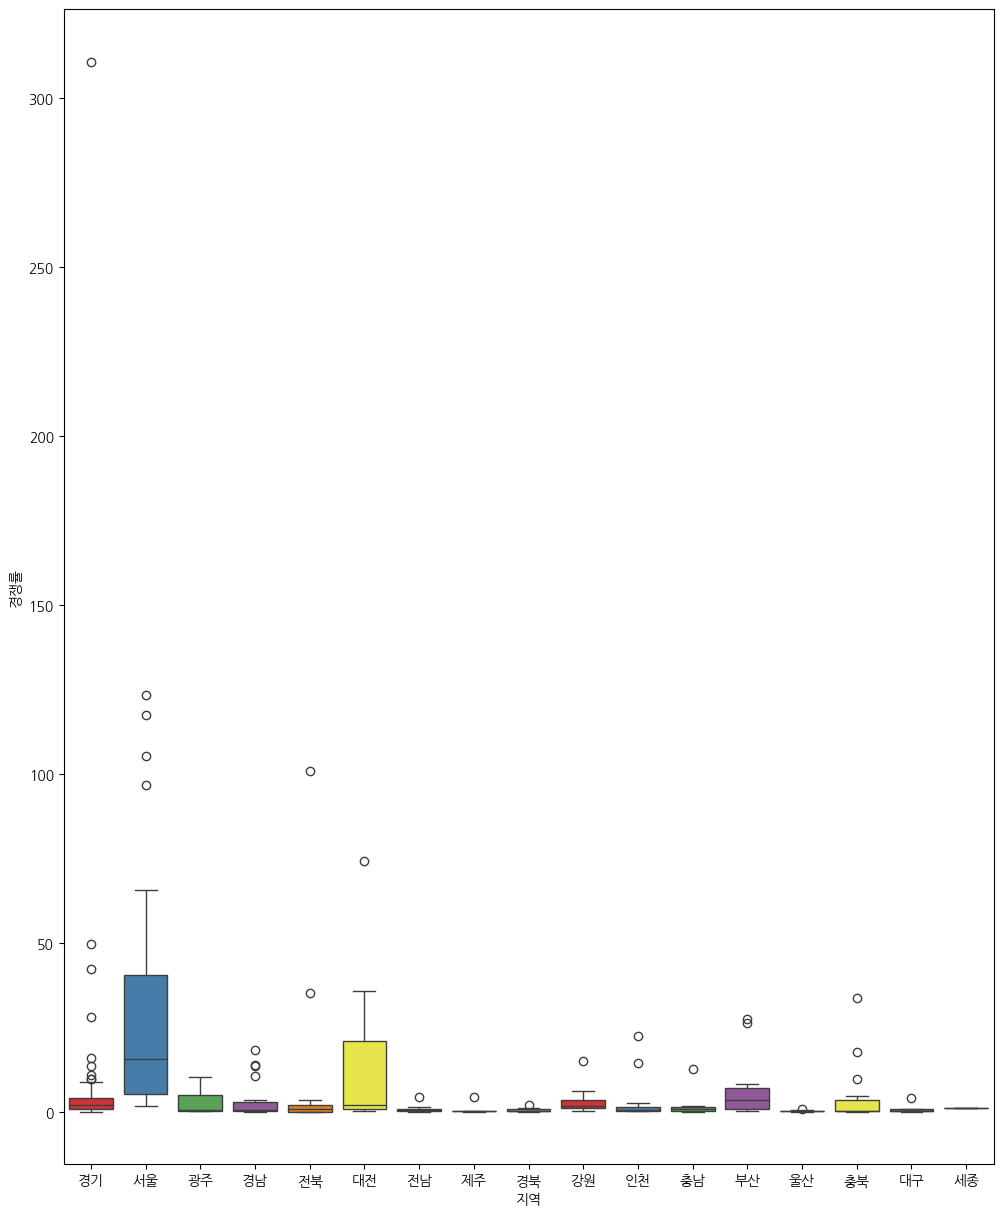

In [43]:
plt.figure(figsize=(12,15))
sns.boxplot(x="지역", y = "경쟁률", data=table_all, palette="Set1")
plt.show()

## 경기도 한곳이 경쟁률이 특히 크지만 대체로 서울과 대전이 경쟁률이 높다

<Axes: title={'center': '가장 경쟁률이 높은 지역'}, ylabel='지역'>

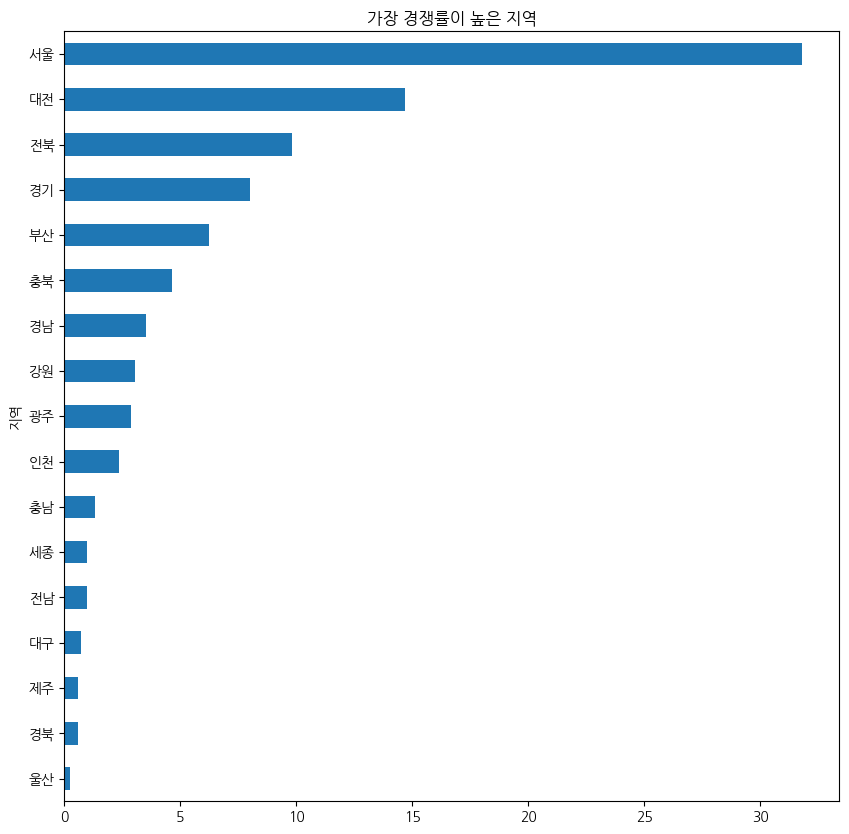

In [63]:
table_all_pivot["경쟁률"].sort_values().plot(kind="barh",title="가장 경쟁률이 높은 지역",figsize=(10,10))

### 경쟁률이 높은 순으로 보면 경기도에 310짜리가 있다

In [59]:
table_all.sort_values(by="경쟁률", ascending=False).head(10)

,지역,주택 구분,분양/임대,주택명,시공사,모집공고일,청약기간,당첨자발표,주소,세대수,접수건수,경쟁률
3,경기,민영,분양주택,힐스테이트 푸르지오 수원,(주)현대건설,2022-09-23,2022-10-04 ~ 2022-10-06,2022-10-13,경기도 수원시 팔달구 교동 155-41번지 일원,6,1865,310.833333
3,서울,민영,분양주택,청량리 롯데캐슬 하이루체,롯데건설(주),2023-06-30,2023-07-10 ~ 2023-07-12,2023-07-18,서울특별시 동대문구 청량리동 199 일원,173,21322,123.248555
5,서울,민영,분양주택,용산 호반써밋 에이디션,(주)호반건설,2023-07-14,2023-07-24 ~ 2023-07-27,2023-08-02,서울특별시 용산구 한강로 2가 210-1번지 일원,90,10575,117.500000
7,서울,민영,분양주택,영등포자이 디그니티,지에스건설(주),2023-02-23,2023-03-06 ~ 2023-03-08,2023-03-14,서울특별시 영등포구 양평동1가 265-1일대,185,19478,105.286486
7,전북,국민,분양전환 가능임대,전주만성에코르2단지 10년공공임대주택 잔여세대 및 예비입주자 모집공고,(주)태영건설 외 4개사,2022-12-05,2022-12-15 ~ 2022-12-16,2022-12-22,"전라북도 전주시 덕진구 만성로 180(만성동, 전주 만성 에코르 2단지)",12,1211,100.916667
3,서울,민영,분양주택,청계 SK VIEW,에스케이에코플랜트(주),2023-08-09,2023-08-21 ~ 2023-08-23,2023-08-29,"서울특별시 성동구 용답1길 7-18 (용답동), 성동구 용답동 121번지 일원",108,10455,96.805556
0,대전,민영,분양주택,갑천2 트리풀시티 엘리프(민영주택),계룡건설 컨소시엄,2022-11-07,2022-11-17 ~ 2022-11-21,2022-11-25,대전광역시 유성구 원신흥동 일원(대전 도안 갑천지구 친수구역 내 2BL),462,34320,74.285714
2,서울,민영,분양주택,롯데캐슬 이스트폴,롯데건설(주),2023-07-21,2023-07-31 ~ 2023-08-02,2023-08-09,서울특별시 광진구 자양동 680-63번지 일원,631,41344,65.521395
8,서울,민영,분양주택,DMC 가재울 아이파크,에이치디씨현대산업개발 주식회사,2023-05-26,2023-06-07 ~ 2023-06-09,2023-06-15,서울특별시 서대문구 남가좌동 289-54번지 일대,92,4672,50.782609
7,경기,민영,분양주택,평택 고덕국제신도시 A-49블록 호반써밋 3차(본청약),(주)호반건설,2023-07-21,2023-07-31 ~ 2023-08-02,2023-08-08,경기도 평택시 고덕국제화계획지구 A49블록,282,13996,49.631206


## 반면 경쟁률이 낮은 하위 10위는

In [60]:
table_all.sort_values(by="경쟁률", ascending=True).head(10)

,지역,주택 구분,분양/임대,주택명,시공사,모집공고일,청약기간,당첨자발표,주소,세대수,접수건수,경쟁률
6,전북,민영,분양주택,부안 줄포 블레스아파트,(주)대덕종합건설,2022-12-09,2022-12-14 ~ 2022-12-15,2022-12-21,전라북도 부안군 줄포면 줄포중앙로 81,64,0,0.000000
2,경남,민영,분양주택,남해 타운하우스,금강종합건설(주),2023-07-07,2023-07-17 ~ 2023-07-19,2023-07-25,경상남도 남해군 납해읍 창선면 당항리 920번지,76,0,0.000000
0,경남,민영,분양주택,수에르떼 밀양,주식회사 유원건설,2023-05-25,2023-05-30 ~ 2023-06-01,2023-06-08,경상남도 밀양시 가곡동 597-1 외 2필지,45,0,0.000000
1,경남,민영,분양주택,대동리 나리안길 107동,주식회사 지엔지종합건설,2023-07-28,2023-08-07 ~ 2023-08-09,2023-08-17,경상남도 거창군 거창읍 대동리 571번지 외 11필지,48,0,0.000000
8,전북,국민,분양주택,군산 한성필하우스,한성건설(주),2023-03-03,2023-03-13 ~ 2023-03-14,2023-03-20,"전라북도 군산시 요죽길 76(오식도동, 한성필하우스)",149,1,0.006711
6,전남,민영,분양주택,함평 엘리체 시그니처,주식회사 서진건설,2022-11-25,2022-12-05 ~ 2022-12-07,2022-12-14,전라남도 함평군 대동면 향교리 827-5외 8필지,232,3,0.012931
3,경북,민영,분양주택,울진 하버펠리체,"세영토건(주), (주)우영종합건설",2023-07-28,2023-08-07 ~ 2023-08-09,2023-08-16,"경상북도 울진군 죽변면 죽변리 254-2,3,4,251-31번지",67,1,0.014925
7,전북,국민,분양주택,군산 한성필하우스,한성건설(주),2022-09-23,2022-10-04 ~ 2022-10-05,2022-10-12,전라북도 군산시 요죽길76(오식도동806-3번지),66,1,0.015152
7,전북,민영,분양주택,북익산 오투그란데 더원,(주)제일건설,2022-10-27,2022-11-07 ~ 2022-11-09,2022-11-16,전라북도 익산시 함열읍 와리 638-4 외 29필지,259,4,0.015444
1,경남,민영,분양주택,거제 한내 시온 숲속의아침뷰,(주)시온건설개발,2023-03-17,2023-03-27 ~ 2023-03-29,2023-04-04,경상남도 거제시 연초면 한내리 산100번지 외 1필지,46,1,0.021739


## 거의 지방에 있으면서 세대 수에 비해 접수건수가 거의 없다

## 주택구분에 따른 평균 세대수

In [67]:
table_all_pivot = table_all.pivot_table(index = "주택 구분", values = "세대수", aggfunc="mean")
table_all_pivot

,세대수
주택 구분,
국민,380.666667
민영,490.156794


## 주택구분에 따른 평균 경쟁률

In [69]:
table_all_pivot = table_all.pivot_table(index = "주택 구분", values = "경쟁률", aggfunc="mean")
table_all_pivot

,경쟁률
주택 구분,
국민,10.873380
민영,7.130513


## 대체로 민영이 공급수가 많고 경쟁률이 적다

## 시공사별 경쟁률

In [70]:
table_all_pivot = table_all.pivot_table(index = "시공사", values = "경쟁률", aggfunc="mean")
table_all_pivot

,경쟁률
시공사,
(유) 명지건설,0.137255
(주) 신태양건설,0.127273
(주) 태영건설,1.062500
(주)KCC건설,1.971014
(주)군장종합건설,0.227679
...,...
현대엔지니어링 주식회사,0.114174
현대엔지니어링(주),1.439824
혜림건설(주),5.159215


<Axes: title={'center': '경쟁률이 높은 시공사 top10'}, ylabel='시공사'>

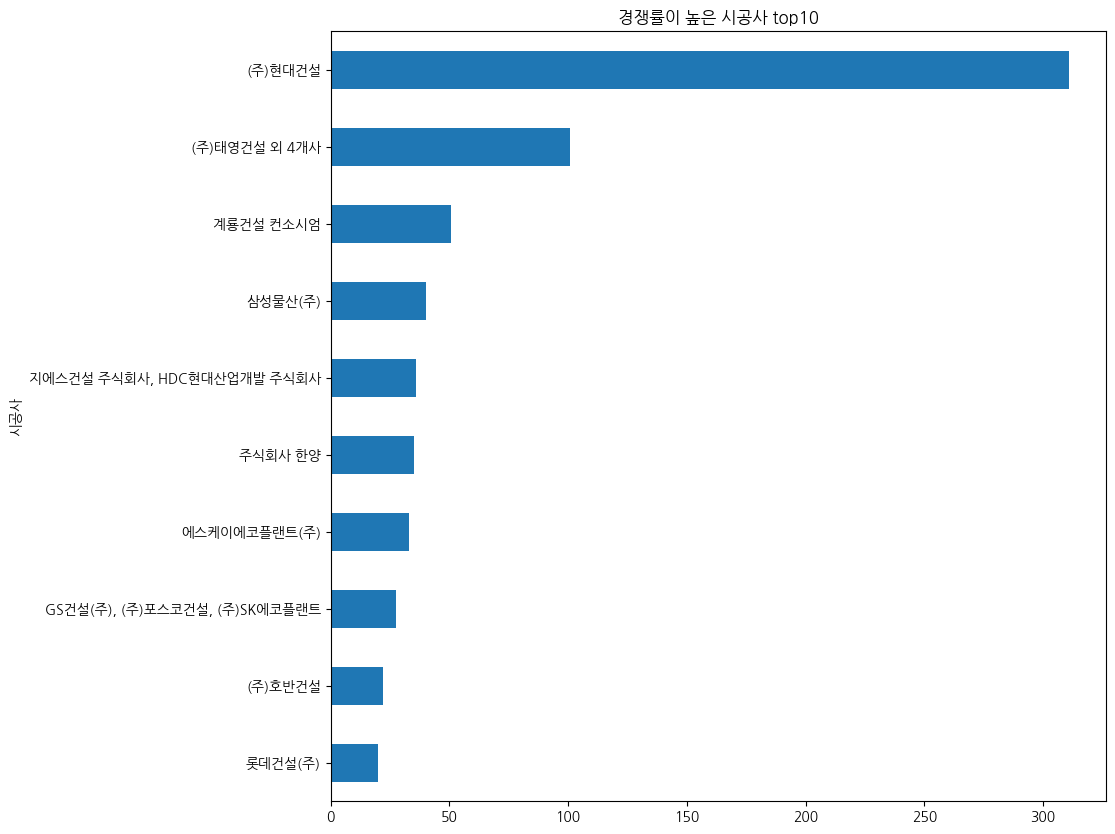

In [78]:
table_all_pivot["경쟁률"].sort_values(ascending=True).tail(10).plot(kind="barh",title="경쟁률이 높은 시공사 top10",figsize=(10,10))

## 현대건설의 경쟁률이 300이상으로 독보적인 모습이다

<Axes: title={'center': '경쟁률이 낮은 시공사 top10'}, ylabel='시공사'>

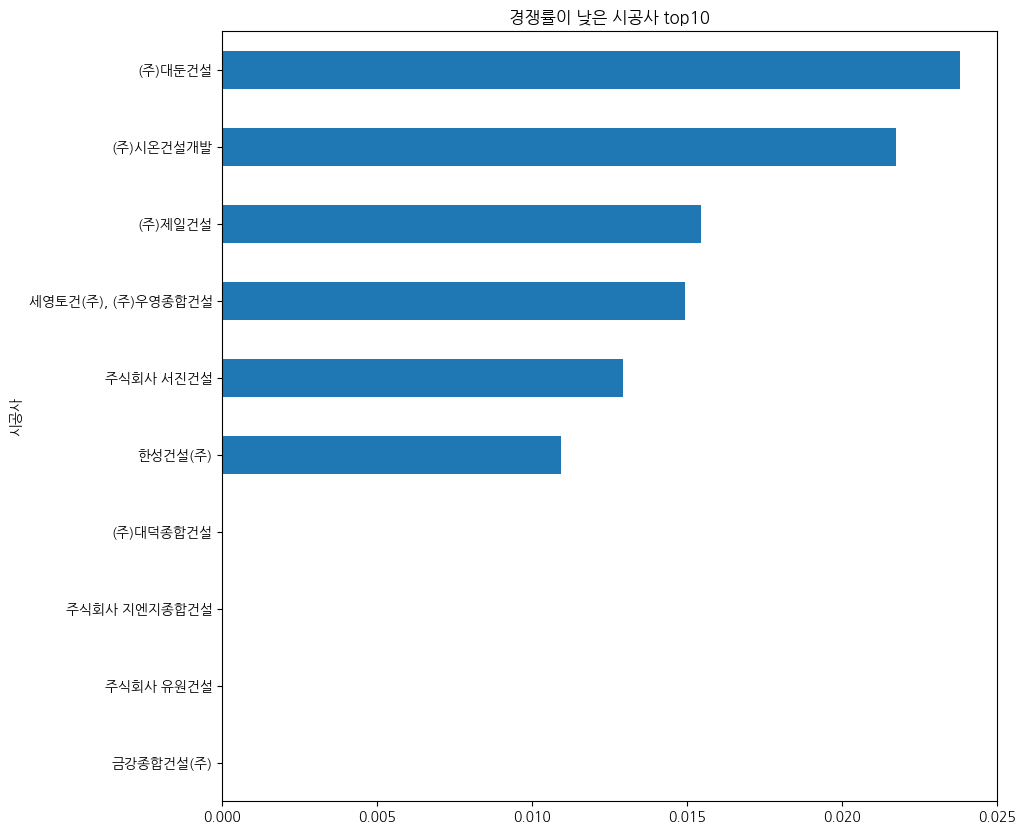

In [77]:
table_all_pivot["경쟁률"].sort_values().head(10).plot(kind="barh",title="경쟁률이 낮은 시공사 top10",figsize=(10,10))

## 0.02정도로 매우 낮고 경쟁률이 0인 곳도 있다

------------

## 건설사별 총 공급세대수

In [80]:
table_all_pivot3 = table_all.pivot_table(index = "시공사", values = "세대수", aggfunc="sum")
table_all_pivot3

,세대수
시공사,
(유) 명지건설,153
(주) 신태양건설,55
(주) 태영건설,64
(주)KCC건설,138
(주)군장종합건설,224
...,...
현대엔지니어링 주식회사,2173
현대엔지니어링(주),2084
혜림건설(주),1021


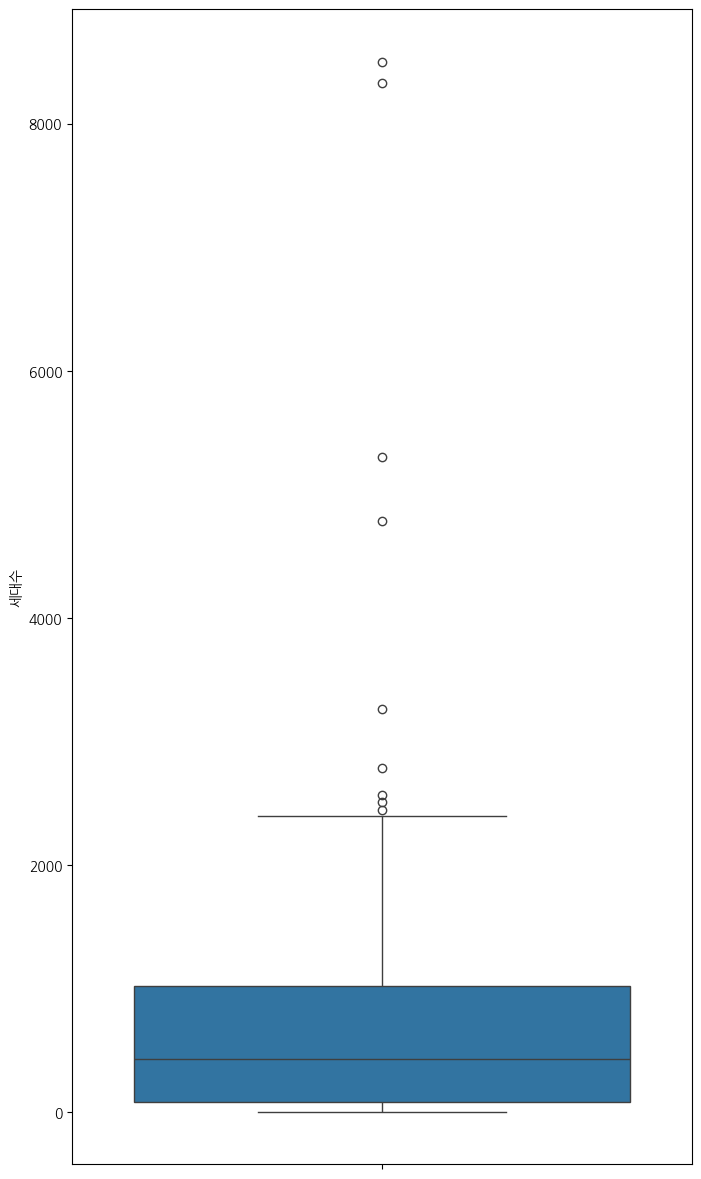

In [84]:
plt.figure(figsize=(8,15))
sns.boxplot(y = "세대수",data=table_all_pivot3)
plt.show()

In [85]:
table_all_pivot3["세대수"].mean()

778.6436170212766

## 평균 780세대정도 공급하지만 8000세대 이상 공급한 건설사도 있다

<Axes: title={'center': '가장 많이 공급한 시공사 top10'}, ylabel='시공사'>

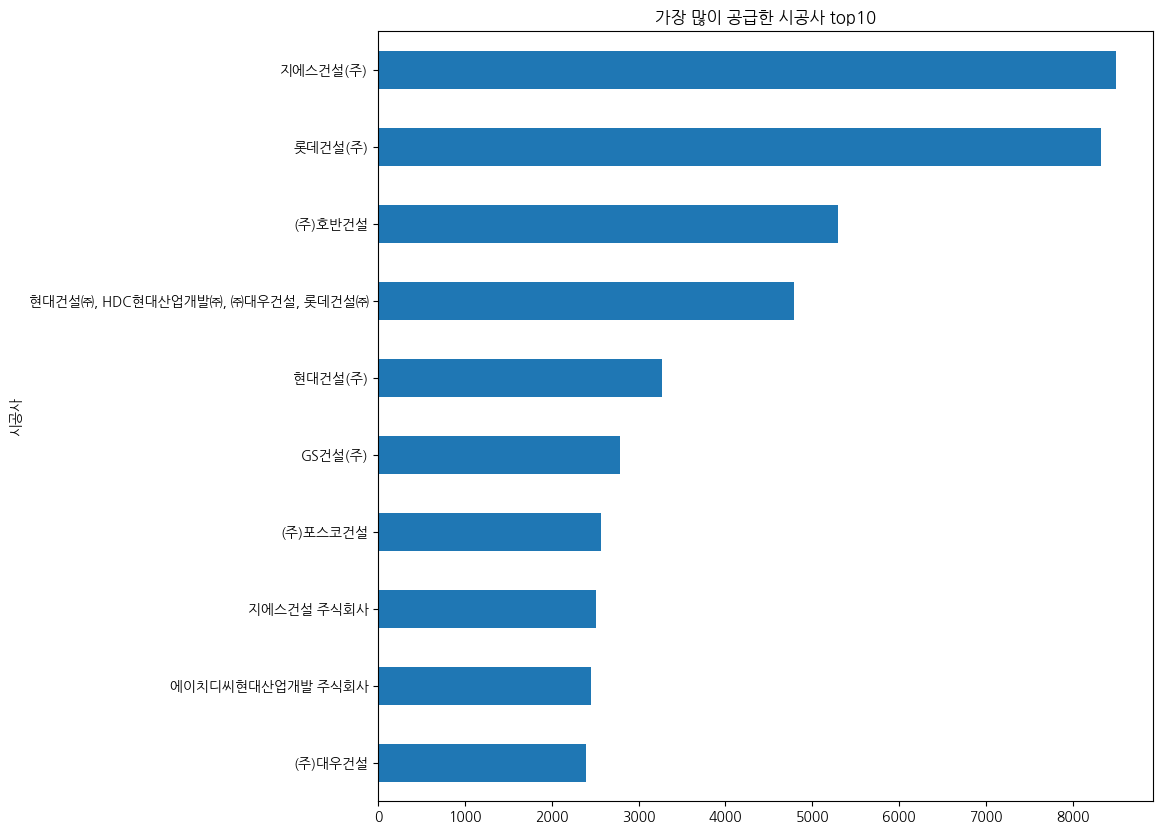

In [86]:
table_all_pivot3["세대수"].sort_values(ascending=True).tail(10).plot(kind="barh",title="가장 많이 공급한 시공사 top10",figsize=(10,10))

### 의외로 경쟁률이 높은 현대건설이 아니라 지에스건설이 가장 많이 공급했다